# Neural Networks for Handwritten Digit Recognition

We gonna made a neural network to recognize ten handwritten digits 0-9, This is a multiclass classification task where one of n choices is selected.

# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, sigmoid, softmax 
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy, SparseCategoricalCrossentropy

# Dataset

We gonna use The MNIST dataset contains 60,000 training images of handwritten digits from 0 to 9, and 10,000 testing images.
The MNIST dataset has 10 different Categories (Classes), The handwritten digits images are represented as a 28×28 pixel grayscale, then there are (28 X 28) 784 features for the individual example.

### Load the MNIST dataset from Keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train, X_test = x_train, x_test

Y_train = y_train.reshape(-1, 1)
Y_test = y_test.reshape(-1, 1)

###  Check the dimensions of our variables

In [4]:
# The Training Examples
print(f"The Features has shape: {X_train.shape}")
print(f"Number of Training examples: {X_train.shape[0]}")
print(f"Number of Features: {X_train.shape[1] * X_train.shape[2]}")

The Features has shape: (60000, 28, 28)
Number of Training examples: 60000
Number of Features: 784


In [5]:
# The Targets of Training examples
print(f"The Target has shape: {Y_train.shape}")
print(f"Number of Training examples: {Y_train.shape[0]}")
print(f"Each Example has output: {Y_train.shape[1]}")

The Target has shape: (60000, 1)
Number of Training examples: 60000
Each Example has output: 1


In [6]:
# The Testing Examples
print(f"The Features has shape: {X_test.shape}")
print(f"Number of Training examples: {X_test.shape[0]}")
print(f"Number of Features: {X_test.shape[1] * X_test.shape[2]}")

The Features has shape: (10000, 28, 28)
Number of Training examples: 10000
Number of Features: 784


In [7]:
# The Targets of the Testing Examples
print(f"The Target has shape: {Y_test.shape}")
print(f"Number of Training examples: {Y_test.shape[0]}")
print(f"Each Example has output: {Y_test.shape[1]}")

The Target has shape: (10000, 1)
Number of Training examples: 10000
Each Example has output: 1


### Try an individual Training example

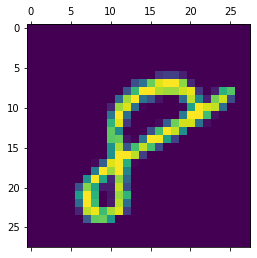

In [8]:
plt.matshow(X_train[59999])
# plt.imshow(X_train[59999], cmap="gray") 
plt.show()

In [9]:
Y_train[59999, 0]

8

### Try an individual Test example

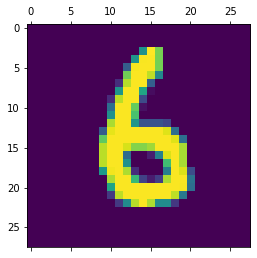

In [10]:
plt.matshow(X_test[594])
# plt.imshow(X_train[59999], cmap="gray") 
plt.show()

In [11]:
Y_test[594, 0]

6

### Visualizing a subset of the training set

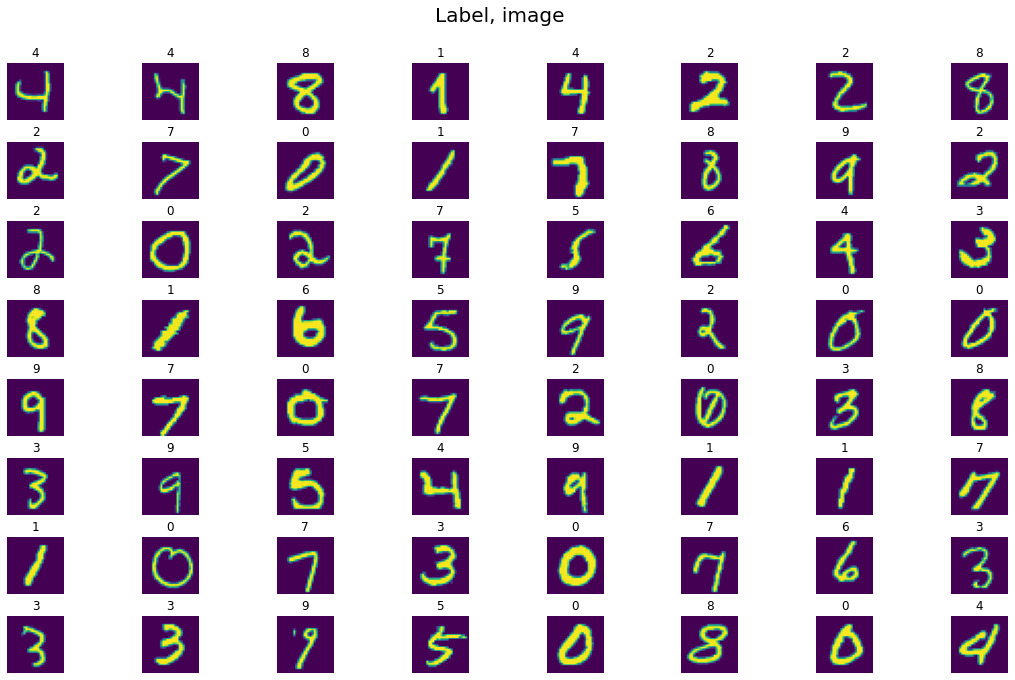

In [12]:
m = X_train.shape[0]
fig, axes = plt.subplots(8,8, figsize=(15,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped) #, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y_train[random_index,0])
    
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=20)

### Visualizing a subset of the testing set

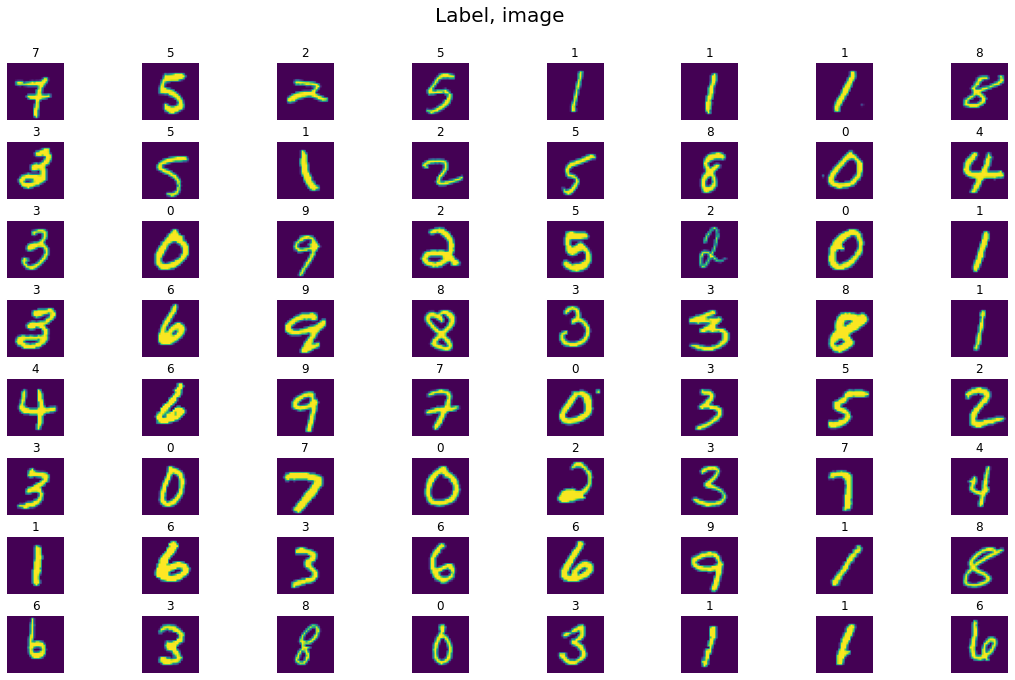

In [13]:
m = X_test.shape[0]
fig, axes = plt.subplots(8,8, figsize=(15,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped) #, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y_test[random_index,0])
    
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=20)

## Flatten the Training & Test Data

### We can notice that Each example is 28x28 pixel image (2 dimensions), So we gonna convert it to 1d vector for each example.

In [14]:
X_train_f = X_train.reshape(60000, 784)
X_test_f = X_test.reshape(10000, 784)
X_train_f.shape, X_test_f.shape

((60000, 784), (10000, 784))

## Normalization

### The values of each Feature ranges from 0 to 255, we need to normalize it before compiling.

In [57]:
norm_l = tf.keras.layers.Normalization(axis=-1)

norm_l.adapt(X_train_f)  # learns mean, variance
X_train_n = norm_l(X_train_f)
  
X_test_n = norm_l(X_test_f)

In [66]:
X_train_n = X_train_f/255.0
X_test_n = X_test_f/255.0

## Tensorflow Model Implementation

In [67]:
model = Sequential(
    [ 
        Dense(256, activation = 'relu', name='layer_1'),
        Dense(128, activation = 'relu', name='layer_2'),
        Dense(10, activation = 'softmax', name='layer_3')    # < softmax activation here
    ]
)

In [68]:
model.build(input_shape=(None, 784))

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 256)               200960    
                                                                 
 layer_2 (Dense)             (None, 128)               32896     
                                                                 
 layer_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"],
)

model.fit(X_train_n, Y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2099 - accuracy: 0.9364
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0841 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0456 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0333 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0213 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [71]:
model.evaluate(X_test_n, y_test)

313/313 [==============================] - 0s 933us/step - loss: 0.0921 - accuracy: 0.9799


[0.09213671088218689, 0.9799000024795532]

#### Good Accuracy!

## Predictions

In [78]:
Predictions = model.predict(X_test_n)
Predictions.shape

313/313 [==============================] - 0s 827us/step


(10000, 10)

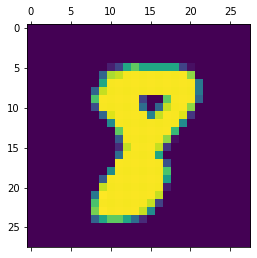

In [81]:
plt.matshow(X_test[580])

In [82]:
np.argmax(Predictions[580])

8

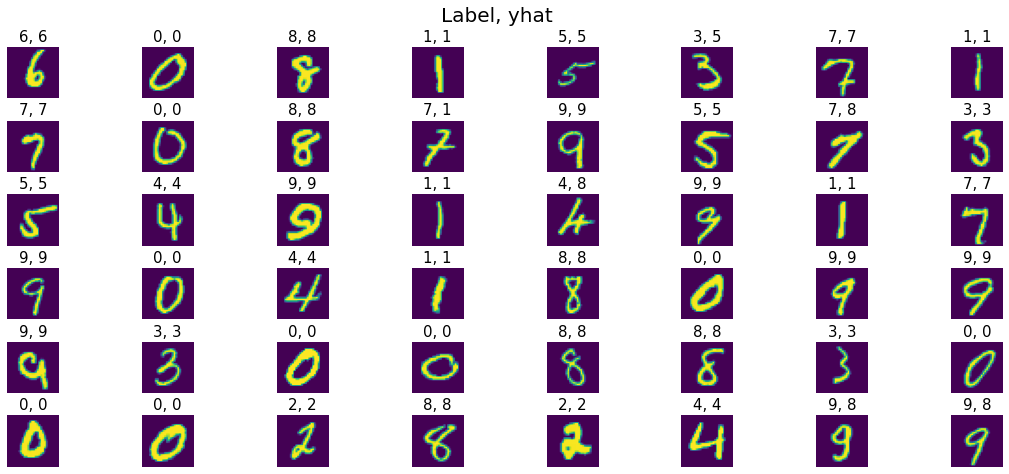

In [48]:
m = X_test.shape[0]
fig, axes = plt.subplots(6, 8, figsize=(15, 7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped) # , cmap='gray')
    
    prediction = model.predict(X_test_f[random_index].reshape(1, 784), verbose=0)
    yhat = np.argmax(prediction)
    
    # Display the label above the image
    ax.set_title(f"{Y_test[random_index,0]}, {yhat}",fontsize=15)
    ax.set_axis_off()
    
fig.suptitle("Label, yhat", fontsize=20)
plt.show()